In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from beautifultable import BeautifulTable as BT

from sklearn.model_selection import train_test_split as separar
from sklearn.preprocessing import MinMaxScaler

In [4]:
datos_compra = pd.read_csv('../tarea02/data/data_compras.csv')
datos_compra.head()

,DNI,Sexo,Edad,Sueldo,Compra
0,15624510,Hombre,19,19000,0
1,15810944,Hombre,35,20000,0
2,15668575,Mujer,26,43000,0
3,15603246,Mujer,27,57000,0
4,15804002,Hombre,19,76000,0


In [5]:
X = datos_compra.iloc[:, 2:-1].values
y = datos_compra['Compra'].values

In [6]:
from sklearn.preprocessing import LabelEncoder
enconder = LabelEncoder()
X[:,0] = enconder.fit_transform(X[:,0])

dataframe = pd.DataFrame(X)
dataframe.head()

,0,1
0,1,19000
1,17,20000
2,8,43000
3,9,57000
4,1,76000


In [7]:
X_train, X_test, y_train, y_test = separar(X, y, test_size=0.25, random_state=0)
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', y_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)

La forma de X_train es:  (300, 2)
La forma de y_train es:  (300,)
La forma de X_test es:  (100, 2)
La forma de y_test es:  (100,)


In [8]:
escaladorX = MinMaxScaler()
X_train = escaladorX.fit_transform(X_train.astype('float64'))
X_test  = escaladorX.transform(X_test.astype('float64'))
X_test[:5,:]

array([[0.28571429, 0.53333333],
       [0.47619048, 0.25925926],
       [0.4047619 , 0.44444444],
       [0.28571429, 0.47407407],
       [0.4047619 , 0.25925926]])

In [9]:
from sklearn.tree import DecisionTreeClassifier as Arbol

clasificador = Arbol(criterion = 'entropy', random_state = 0)
clasificador.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
y_fit = clasificador.predict(X_train)
y_pred = clasificador.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix as CM
cm = CM(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


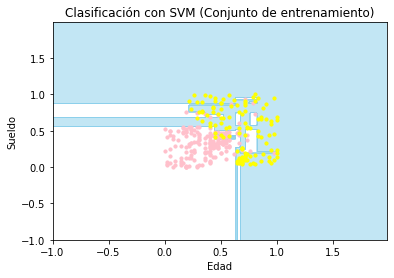

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


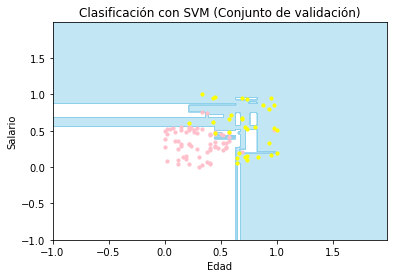

In [16]:
from matplotlib.colors import ListedColormap as Colors
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = Colors(('white', 'skyblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = Colors(('pink', 'yellow'))(i), label = j, s=10)
plt.title('Clasificación con SVM (Conjunto de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo')
plt.show()


from matplotlib.colors import ListedColormap as Colors
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = Colors(('white', 'skyblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = Colors(('pink', 'yellow'))(i), label = j, s=10)
plt.title('Clasificación con SVM (Conjunto de validación)')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()